### Importación de librerías necesarias:

In [8]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

### Carga de datos desde los ficheros

In [9]:
client_test = pd.read_csv('client_test.csv')
client_train = pd.read_csv('client_train.csv')
invoice_test = pd.read_csv('invoice_test.csv')
invoice_train = pd.read_csv('invoice_train.csv')

Acceso a la siguiente información del dataset cargado:
- número total de columnas
- número total de filas
- numero de valores nulos
- tipo de datos de cada columna (en este caso objetct, float e int)

In [10]:
print('Info del dataset "client_test":\n')
client_test.info()
print('-------------------------------------------------')
print('\nInfo del dataset "client_train":\n')
client_train.info()
print('-------------------------------------------------')
print('\nInfo del dataset "invoice_test":\n')
invoice_test.info()
print('-------------------------------------------------')
print('\nInfo del dataset "invoice_train":\n')
invoice_train.info()

Info del dataset "client_test":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58069 entries, 0 to 58068
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   disrict        58069 non-null  int64 
 1   client_id      58069 non-null  object
 2   client_catg    58069 non-null  int64 
 3   region         58069 non-null  int64 
 4   creation_date  58069 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.2+ MB
-------------------------------------------------

Info del dataset "client_train":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object

Muestra de los 10 primeros registros de los dataset de entrenamiento:

In [11]:
client_train.head(n=10)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0
5,69,train_Client_10000,11,103,29/09/1993,0.0
6,62,train_Client_100000,11,309,07/06/2012,0.0
7,60,train_Client_100001,11,101,12/04/2006,0.0
8,62,train_Client_100002,11,301,31/12/2006,0.0
9,60,train_Client_100003,11,101,25/10/2011,0.0


In [12]:
invoice_train.head(n=10)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
5,train_Client_0,2017-07-17,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8,ELEC
6,train_Client_0,2018-12-07,11,1335667,0,207,9,1,541,0,0,0,15952,16493,12,ELEC
7,train_Client_0,2019-03-19,11,1335667,0,207,9,1,585,0,0,0,16493,17078,8,ELEC
8,train_Client_0,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4,ELEC
9,train_Client_0,2011-11-22,11,1335667,0,203,6,1,1082,0,0,0,9156,10238,4,ELEC


Acceso al resumen estadístico de los dataset de entrenamiento:

In [13]:
client_train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [14]:
invoice_train.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


Máximo año del que se disponen datos de clientes

In [15]:
print(pd.to_datetime(client_train['creation_date']).max())
print(pd.to_datetime(client_train['creation_date']).min())

2019-09-10 00:00:00
1977-02-05 00:00:00


### Comprobación de valores nulos por columna en los dataset de entrenamiento
No hay valores nulos.

In [16]:
client_missing_values = client_train.isnull().sum()
print('Valores nulos dataset "client_train":')
print(client_missing_values)

Valores nulos dataset "client_train":
disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64


In [17]:
invoice_missing_values = invoice_test.isnull().sum()
print('Valores nulos dataset "invoice_test":')
print(invoice_missing_values)

Valores nulos dataset "invoice_test":
client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64


### Análisis valores únicos del dataset de entrenamiento

In [18]:
for col in client_train.columns:
    print(f"{col} - {client_train[col].nunique()}")

disrict - 4
client_id - 135493
client_catg - 3
region - 25
creation_date - 8088
target - 2


In [19]:
for col in ['disrict', 'region', 'client_catg']:
    print('\nValores únicos variable ', col, ':', client_train[col].nunique())
    print(sorted(client_train[col].unique()))



Valores únicos variable  disrict : 4
[60, 62, 63, 69]

Valores únicos variable  region : 25
[101, 103, 104, 105, 106, 107, 199, 206, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 371, 372, 379, 399]

Valores únicos variable  client_catg : 3
[11, 12, 51]


In [20]:
#Obtener valores únicos en los datos del entrenamiento de facturas
for col in invoice_train.columns:
    print(f"{col} - {invoice_train[col].nunique()}")

client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 16
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [21]:
for col in ['counter_type', 'counter_statue', 'tarif_type']:
    print('\nValores únicos en train de la variable "',col,'":', invoice_train[col].nunique())
    print(invoice_train[col].unique())


Valores únicos en train de la variable " counter_type ": 2
['ELEC' 'GAZ']

Valores únicos en train de la variable " counter_statue ": 16
[0 1 5 4 3 2 769 '0' '5' '1' '4' 'A' 618 269375 46 420]

Valores únicos en train de la variable " tarif_type ": 17
[11 40 15 10 12 14 13 45 29  9 30  8 21 42 27 18 24]


In [22]:
# Calcular el número de clientes únicos por cada valor de counter_statue
clients_counter_statue = invoice_train.groupby('counter_statue')['client_id'].nunique()

# Imprimir los resultados
print("Número de clientes únicos por cada valor posible de counter_statue:")
print(clients_counter_statue)

Número de clientes únicos por cada valor posible de counter_statue:
counter_statue
0         133366
1          34371
2             25
3             74
4            604
5          16874
46             1
420            1
618            1
769            1
269375         1
0           1002
1            257
4              5
5            127
A              1
Name: client_id, dtype: int64


In [23]:
for col in ['counter_type', 'counter_statue', 'tarif_type']:
    print('\nValores únicos en test de la variable "',col,'":', invoice_test[col].nunique())
    print(sorted(invoice_test[col].unique()))


Valores únicos en test de la variable " counter_type ": 2
['ELEC', 'GAZ']

Valores únicos en test de la variable " counter_statue ": 6
[0, 1, 2, 3, 4, 5]

Valores únicos en test de la variable " tarif_type ": 16
[8, 9, 10, 11, 12, 13, 14, 15, 21, 24, 27, 29, 30, 40, 42, 45]


### Distribución de los datos de entrenamiento

#### - Por la variable etiqueta
Valores posibles de "target": 0 - No Fraude, 1 - Fraude

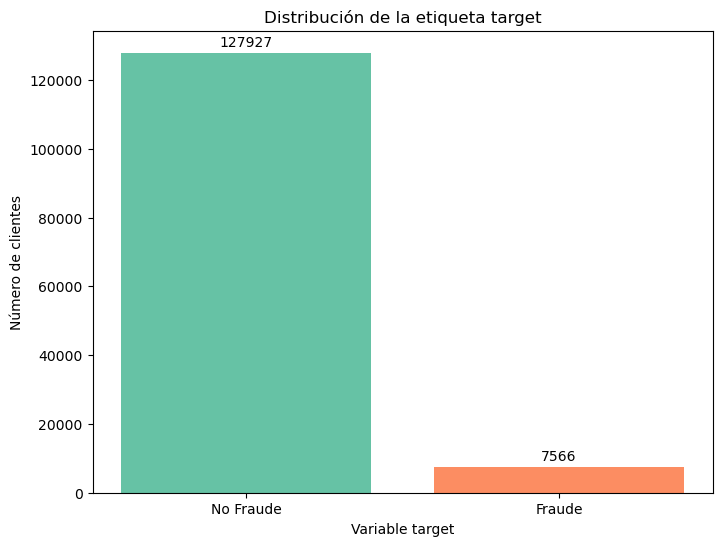

In [24]:
# Calcular la estadística de target
target_statistics = client_train.groupby(['target'])['client_id'].count()

plt.figure(figsize=(8, 6))

# Crear el gráfico de barras
plt.bar(x=target_statistics.index, 
        height=target_statistics.values,
        tick_label=['No Fraude', 'Fraude'], 
        color = ['#66c2a5', '#fc8d62'])

# Añadir etiquetas a las barras
for i, value in enumerate(target_statistics.values):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom')
    
# Configura el título del gráfico
plt.title('Distribución de la etiqueta target')
plt.xlabel('Variable target')
plt.ylabel('Número de clientes')

# Muestra el gráfico
plt.show()


#### - Por las variables descriptivas

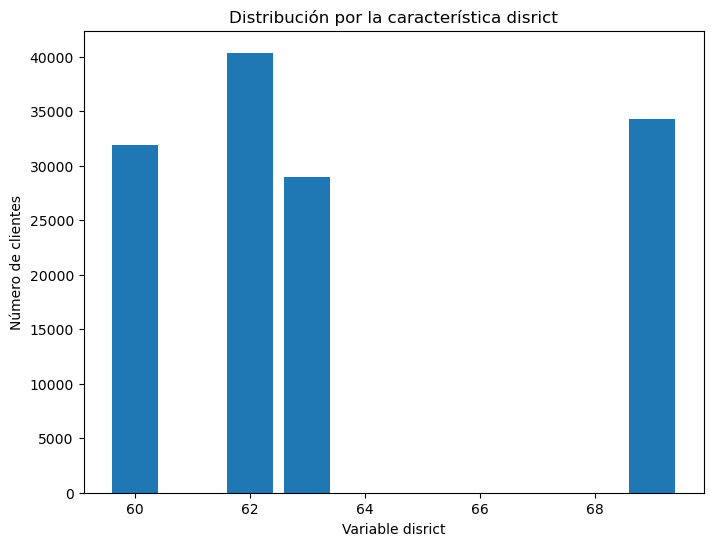

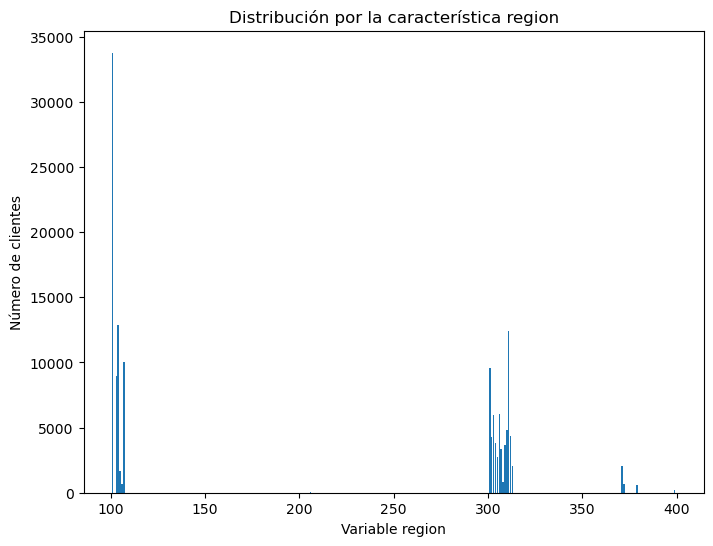

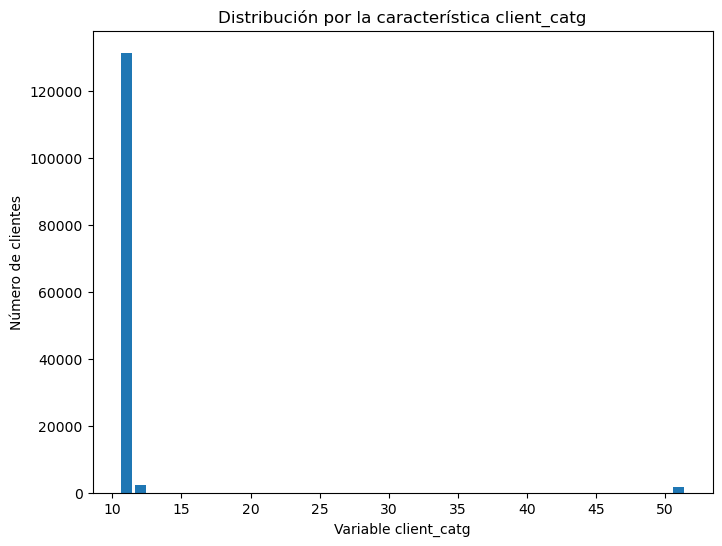

In [25]:
for col in ['disrict','region','client_catg']:
    distribution = client_train.groupby([col])['client_id'].count()
    
    plt.figure(figsize=(8, 6))
    
    plt.bar(x=distribution.index, 
            height=distribution.values)
    
    plt.title('Distribución por la característica '+ col)
    plt.xlabel('Variable ' + col)
    plt.ylabel('Número de clientes')

    plt.show()


In [26]:
# Fusionar los conjuntos de datos invoice y client en base a la columna client_id
merged_data = pd.merge(invoice_train, client_train[['client_id', 'target']], on='client_id', how='inner')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   client_id             object 
 1   invoice_date          object 
 2   tarif_type            int64  
 3   counter_number        int64  
 4   counter_statue        object 
 5   counter_code          int64  
 6   reading_remarque      int64  
 7   counter_coefficient   int64  
 8   consommation_level_1  int64  
 9   consommation_level_2  int64  
 10  consommation_level_3  int64  
 11  consommation_level_4  int64  
 12  old_index             int64  
 13  new_index             int64  
 14  months_number         int64  
 15  counter_type          object 
 16  target                float64
dtypes: float64(1), int64(12), object(4)
memory usage: 580.6+ MB


#### Correlación

In [27]:
# Seleccionar solo las columnas numéricas
numeric_columns2 = client_train.select_dtypes(include=['int64', 'float64'])

# Calcular la correlación entre las variables numéricas
correlation_matrix2 = numeric_columns2.corr()

# Calcular la correlación con una columna específica
correlation_with_target2 = correlation_matrix2['target']

# Ordenar la serie de correlación en orden descendente
correlation_with_target_sorted2 = correlation_with_target2.sort_values(ascending=False)

# Mostrar la correlación con la columna target ordenada en descendente
print(correlation_with_target_sorted2)


target         1.000000
client_catg    0.054745
disrict        0.050749
region         0.010940
Name: target, dtype: float64


In [28]:
# Seleccionar solo las columnas numéricas
numeric_columns = merged_data.select_dtypes(include=['int64', 'float64'])

# Calcular la correlación entre las variables numéricas
correlation_matrix = numeric_columns.corr()

# Calcular la correlación con una columna específica
correlation_with_target = correlation_matrix['target']

# Ordenar la serie de correlación en orden descendente
correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

# Mostrar la correlación con la columna target ordenada en descendente
print(correlation_with_target_sorted)


target                  1.000000
new_index               0.028187
counter_number          0.028005
old_index               0.027519
consommation_level_3    0.023712
tarif_type              0.013382
consommation_level_4    0.013093
consommation_level_2    0.008421
months_number           0.006669
consommation_level_1    0.005514
reading_remarque        0.004768
counter_code           -0.002106
counter_coefficient    -0.002853
Name: target, dtype: float64


### Feature Engineering

#### - Feature transformation

In [29]:
# Función que modifica tipos de datos
def feature_transformation (client, invoice):
    
    # Modificación a tipo de dato 'category'
    client['disrict'] = client['disrict'].astype('category')
    client['region'] = client['region'].astype('category')
    client['client_catg'] =client['client_catg'].astype('category')
    
    # Modificación a tipo de dato 'category'
    if 'target' in client.columns:
        # Convertir la columna 'target' a tipo booleano
        client['target'] =client['target'].astype(bool)
    
    # Modificación a tipo de dato 'datatime'
    client['creation_date'] = pd.to_datetime(client['creation_date'], format='%d/%m/%Y')
    
    invoice['invoice_date'] = pd.to_datetime(invoice['invoice_date'], format='%Y-%m-%d')
    invoice['counter_type'] = invoice['counter_type'].map({"ELEC":1,"GAZ":0})
     
    return client, invoice   

In [30]:
client_train_new1, invoice_train_new1 = feature_transformation(client_train, invoice_train)
client_test_new1, invoice_test_new1 = feature_transformation(client_test, invoice_test)

#### - Feature creation

In [31]:
# Creación de nuevas características
def feature_creation (client, invoice):   

    # nueva variable 'region_group': agrupación de region
    client['region_group'] = client['region'].apply(lambda x: 100 if x<=100 else 300 if x>=300 else 200).astype('category')
    
    # nueva variable 'months_old': antigüedad en meses de cada cliente (¿calcular sobre 2019 o 2024?)
    client['months_old'] = (2019 - client['creation_date'].dt.year)*12 - client['creation_date'].dt.month
    
    # nueva variable 'invoice_month_date': mes de la facturación
    invoice['month_invoice_date'] = invoice['invoice_date'].dt.month
    
    # nueva variable 'invoice_year_date': año de la facturación
    invoice['year_invoice_date'] = invoice['invoice_date'].dt.year
    
    # nueva variable 'is_weekday': la facturación corresponde a un día laborable (entre semana) o fin de semana
    invoice['is_weekday'] = (invoice['invoice_date'].dt.weekday < 5).astype(int)

    # nueva variable 'counter_statue_new': si 'counter_statue' es un valor numérico entre 0 y 5 se mantendrá su valor sino se asignará 99
    invoice['counter_statue_new'] = invoice['counter_statue'].map(lambda x: int(x) 
                                                                  if isinstance(x, str) 
                                                                  and x.isdigit() 
                                                                  and 0 <= int(x) <= 5 
                                                                  else 99).astype('category')
    
    
    # nueva variable 'variation_index'
    invoice['variation_index'] = invoice['new_index'] - invoice['old_index']
    
    return client, invoice

In [32]:
client_train_new2, invoice_train_new2 = feature_creation(client_train_new1, invoice_train_new1)
client_test_new2, invoice_test_new2 = feature_creation(client_test_new1, invoice_test_new1)

In [33]:
print('\nInfo del nuevo dataset "client_train_new2":\n')
client_train_new2.info()
print('-------------------------------------------------')
print('\nInfo del nuevo dataset "invoice_train_new2":\n')
invoice_train_new2.info()


Info del nuevo dataset "client_train_new2":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   disrict        135493 non-null  category      
 1   client_id      135493 non-null  object        
 2   client_catg    135493 non-null  category      
 3   region         135493 non-null  category      
 4   creation_date  135493 non-null  datetime64[ns]
 5   target         135493 non-null  bool          
 6   region_group   135493 non-null  category      
 7   months_old     135493 non-null  int32         
dtypes: bool(1), category(4), datetime64[ns](1), int32(1), object(1)
memory usage: 3.2+ MB
-------------------------------------------------

Info del nuevo dataset "invoice_train_new2":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column            

#### - Nuevo dataset

In [34]:
def generate_dataset_new(client, invoice):

    
    # Agrupar por 'client_id' y contar el número de filas por cliente
    number_invoices = invoice.groupby('client_id').size().reset_index(name='number_invoices')
    
    # Fusionar el resultado con el dataset 'client' por 'client_id'
    client = pd.merge(client, number_invoices, on='client_id', how='left')

    
    
    # Calcular la media de 'is_weekday' por cliente
    is_weekday_mean = invoice.groupby('client_id')['is_weekday'].mean().reset_index(name='is_weekday_mean')

    # Fusionar la nueva variable 'is_weekday_mean' con el dataset 'client'
    client = pd.merge(client, is_weekday_mean, on='client_id', how='left')
    
    
    
    # Calcular la media de counter_type para cada cliente en invoice_train
    counter_type_mean = invoice.groupby('client_id')['counter_type'].unique().apply(lambda x: sum(x) / len(x)).reset_index(name='counter_type_mean')

    # Fusionar la nueva variable 'counter_type_mean' con el dataset 'client'
    client = pd.merge(client, counter_type_mean, on='client_id', how='left')
    
    
    
    # Calcular la media de 'variation_index_mean' por cliente
    variation_index_mean = invoice.groupby('client_id')['variation_index'].mean().reset_index(name='variation_index_mean')

    # Fusionar la nueva variable 'variation_index_mean' con el dataset 'client'
    client = pd.merge(client, variation_index_mean, on='client_id', how='left')
    
    
    
    # Obtener la diferencia de días entre las facturas para cada cliente
    invoice['variation_time'] = invoice.groupby('client_id')['invoice_date'].diff().dt.days
    
    # Calcular las estadísticas de variation_time por cliente
    variation_time_agg = invoice.groupby('client_id')['variation_time'].agg(['mean', 'std', 'min', 'max'])
    
    # Renombrar las columnas del dataset de estadísticas de variation_time
    variation_time_agg.columns = ['variation_time_mean', 'variation_time_std', 'variation_time_min', 'variation_time_max']
    
    # Fusionar el dataset de estadísticas de variation_time con el dataset de clientes
    client = pd.merge(client, variation_time_agg, on='client_id', how='left')
    
    # Establecer a cero las estadísticas de variación de tiempo si number_invoices es 1 o 2 y hay valores faltantes
    client.loc[(client['number_invoices'] <= 2) 
               & (client[['variation_time_mean', 'variation_time_std', 
                          'variation_time_min', 'variation_time_max']].isnull().any(axis=1))
               , ['variation_time_mean', 'variation_time_std', 'variation_time_min', 'variation_time_max']] = 0
    
    
    #-- Se comenta tarif_type_frequency porque tiene baja correlación con target
    
    # Contar la frecuencia de cada tipo de tarifa para cada cliente
    #tarif_type_frequency = invoice.groupby(['client_id', 'tarif_type']).size().unstack(fill_value=0)

    # Renombrar las columnas
    #tarif_type_frequency.columns = [f'tarif_type_frequency_{col}' for col in tarif_type_frequency.columns]

    # Fusionar 'tarif_type_frequency' con el dataset 'client'
    #client = pd.merge(client, tarif_type_frequency, on='client_id', how='left')
    
    
    
    # Seleccionar las columnas que comienzan por 'consommation' en el DataFrame invoice
    consommation_columns = [col for col in invoice.columns if col.startswith('consommation')]

    # Calcular las estadísticas deseadas para estas columnas
    consommation_stats = invoice.groupby('client_id')[consommation_columns].agg(['mean', 'std', 'min', 'max'])

    # Renombrar las columnas resultantes para que sean más descriptivas
    consommation_stats.columns = ['_'.join(col).strip() for col in consommation_stats.columns.values]

    # Fusionar las estadísticas de consommation al DataFrame principal "client_train"
    client = pd.merge(client, consommation_stats, on='client_id', how='left')
    
    # Establecer a cero las estadísticas de consumo si number_invoices es 1 o 2 y hay valores faltantes
    # Filtrar las columnas de estadísticas de consumo
    consommation_stats_columns = [col for col in consommation_stats.columns if col.startswith('consommation')]
    client.loc[(client['number_invoices'] <= 2) & (client[consommation_stats_columns].isnull().any(axis=1)), 
               consommation_stats_columns] = 0

    return client


In [35]:
invoice_train_new2_order = invoice_train_new2.sort_values(['client_id', 'invoice_date'])
invoice_test_new2_order = invoice_test_new2.sort_values(['client_id', 'invoice_date'])

In [36]:
dataset_train_new1 = generate_dataset_new(client_train_new2, invoice_train_new2_order)
dataset_test_new1 = generate_dataset_new(client_test_new2, invoice_test_new2_order)

In [37]:
print('\nInfo del nuevo dataset "dataset_train_new1":\n')
dataset_train_new1.info()


Info del nuevo dataset "dataset_train_new1":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   disrict                    135493 non-null  category      
 1   client_id                  135493 non-null  object        
 2   client_catg                135493 non-null  category      
 3   region                     135493 non-null  category      
 4   creation_date              135493 non-null  datetime64[ns]
 5   target                     135493 non-null  bool          
 6   region_group               135493 non-null  category      
 7   months_old                 135493 non-null  int32         
 8   number_invoices            135493 non-null  int64         
 9   is_weekday_mean            135493 non-null  float64       
 10  counter_type_mean          135493 non-null  float64       
 11  varia

In [38]:
dataset_train_new1.head(n=10)

,disrict,client_id,client_catg,region,creation_date,target,region_group,months_old,number_invoices,is_weekday_mean,...,consommation_level_2_min,consommation_level_2_max,consommation_level_3_mean,consommation_level_3_std,consommation_level_3_min,consommation_level_3_max,consommation_level_4_mean,consommation_level_4_std,consommation_level_4_min,consommation_level_4_max
0,60,train_Client_0,11,101,1994-12-31,False,200,288,35,0.971429,...,0,186,0.000000,0.000000,0,0,0.000000,0.000000,0,0
1,69,train_Client_1,11,107,2002-05-29,False,200,199,37,0.945946,...,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0
2,62,train_Client_10,11,301,1986-03-13,False,300,393,18,0.944444,...,0,682,0.000000,0.000000,0,0,0.000000,0.000000,0,0
3,69,train_Client_100,11,105,1996-07-11,False,200,269,20,0.950000,...,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0
4,62,train_Client_1000,11,303,2014-10-14,False,300,50,14,0.714286,...,0,400,117.357143,289.433294,0,800,36.714286,105.421081,0,382
5,69,train_Client_10000,11,103,1993-09-29,False,200,303,48,0.875000,...,0,400,3.770833,26.125100,0,181,0.000000,0.000000,0,0
6,62,train_Client_100000,11,309,2012-06-07,False,300,78,40,1.000000,...,0,262,0.000000,0.000000,0,0,0.000000,0.000000,0,0
7,60,train_Client_100001,11,101,2006-04-12,False,200,152,78,0.871795,...,0,64,0.000000,0.000000,0,0,0.000000,0.000000,0,0
8,62,train_Client_100002,11,301,2006-12-31,False,300,144,2,1.000000,...,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,0
9,60,train_Client_100003,11,101,2011-10-25,False,200,86,5,1.000000,...,0,5624,320.000000,438.178046,0,800,4882.000000,7024.667928,0,15257


In [39]:
# Seleccionar solo las columnas numéricas
numeric_columns3 = dataset_train_new1.select_dtypes(include=['int64', 'float64', 'bool', 'category'])

# Calcular la correlación entre las variables numéricas
correlation_matrix3 = numeric_columns3.corr()

# Calcular la correlación con una columna específica
correlation_with_target3 = correlation_matrix3['target']

# Ordenar la serie de correlación en orden descendente
correlation_with_target_sorted3 = correlation_with_target3.sort_values(ascending=False)

# Mostrar la correlación con la columna target ordenada en descendente
print(correlation_with_target_sorted3)


target                       1.000000
number_invoices              0.127044
consommation_level_3_max     0.099314
consommation_level_3_std     0.083895
variation_time_max           0.061732
client_catg                  0.054745
disrict                      0.050749
consommation_level_4_max     0.043471
consommation_level_1_std     0.036500
consommation_level_4_std     0.033235
consommation_level_3_mean    0.033081
consommation_level_1_max     0.032657
variation_time_std           0.031253
consommation_level_2_max     0.020458
consommation_level_2_std     0.019455
consommation_level_4_mean    0.017121
consommation_level_1_mean    0.016622
consommation_level_2_mean    0.013313
region                       0.010940
region_group                 0.008828
variation_index_mean         0.007183
consommation_level_3_min    -0.001171
consommation_level_4_min    -0.001848
is_weekday_mean             -0.005732
consommation_level_2_min    -0.006076
variation_time_mean         -0.006389
consommation

Dado que existen clientes con dos o menos facturaciones y que, por lo tanto, no se disponen de todos los datos de variación, se pretende analizar si es necesario tenerlos en cuenta en el modelo a aplicar o se pueden eliminar

In [40]:
# Para clientes con number_invoices <= 2
clients_grouped_leq_2 = dataset_train_new1[dataset_train_new1['number_invoices'] <= 2].groupby('target')['client_id'].nunique()

# Para clientes con number_invoices > 2
clients_grouped_gt_2 = dataset_train_new1[dataset_train_new1['number_invoices'] > 2].groupby('target')['client_id'].nunique()

print("Clientes con number_invoices <= 2:")
print(clients_grouped_leq_2)

print("\nClientes con number_invoices > 2:")
print(clients_grouped_gt_2)



# Total de clientes por target
clients_grouped = dataset_train_new1.groupby('target')['client_id'].nunique()

print("\nClientes por target:")
print(clients_grouped)


Clientes con number_invoices <= 2:
target
False    9514
True       73
Name: client_id, dtype: int64

Clientes con number_invoices > 2:
target
False    118413
True       7493
Name: client_id, dtype: int64

Clientes por target:
target
False    127927
True       7566
Name: client_id, dtype: int64


In [41]:
# Eliminar las variables 'client_id' y 'creation_date', ya que son variables innecesarias para predecir si es fraudulento o no
def drop_columns (dataset):

    col_drop = ['client_id', 'creation_date']
    for col in col_drop:
        dataset = dataset.drop([col], axis=1)
        
    return dataset

In [42]:
dataset_train_new2 = drop_columns(dataset_train_new1)
#dataset_test_new2 = drop_columns(dataset_test_new1)


dataset_test_useA = dataset_train_new1
dataset_test_use_dropA = drop_columns(dataset_train_new1)

dataset_test_useB = dataset_test_new1
dataset_test_use_dropB = drop_columns(dataset_test_new1)

# Generar un nuevo dataset eliminando los registros con number_invoices menor o igual a 2
dataset_train_new2_filtered = dataset_train_new2[dataset_train_new2['number_invoices'] > 2].copy()

In [43]:
dataset_test_useA.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'region_group', 'months_old', 'number_invoices',
       'is_weekday_mean', 'counter_type_mean', 'variation_index_mean',
       'variation_time_mean', 'variation_time_std', 'variation_time_min',
       'variation_time_max', 'consommation_level_1_mean',
       'consommation_level_1_std', 'consommation_level_1_min',
       'consommation_level_1_max', 'consommation_level_2_mean',
       'consommation_level_2_std', 'consommation_level_2_min',
       'consommation_level_2_max', 'consommation_level_3_mean',
       'consommation_level_3_std', 'consommation_level_3_min',
       'consommation_level_3_max', 'consommation_level_4_mean',
       'consommation_level_4_std', 'consommation_level_4_min',
       'consommation_level_4_max'],
      dtype='object')

In [44]:
print('\nInfo del nuevo dataset "dataset_train_new2":\n')
dataset_train_new2.info()


Info del nuevo dataset "dataset_train_new2":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   disrict                    135493 non-null  category
 1   client_catg                135493 non-null  category
 2   region                     135493 non-null  category
 3   target                     135493 non-null  bool    
 4   region_group               135493 non-null  category
 5   months_old                 135493 non-null  int32   
 6   number_invoices            135493 non-null  int64   
 7   is_weekday_mean            135493 non-null  float64 
 8   counter_type_mean          135493 non-null  float64 
 9   variation_index_mean       135493 non-null  float64 
 10  variation_time_mean        135493 non-null  float64 
 11  variation_time_std         135493 non-null  float64 
 12  variation_time_min       

In [45]:
dataset_train_new2.describe()

,months_old,number_invoices,is_weekday_mean,counter_type_mean,variation_index_mean,variation_time_mean,variation_time_std,variation_time_min,variation_time_max,consommation_level_1_mean,...,consommation_level_2_min,consommation_level_2_max,consommation_level_3_mean,consommation_level_3_std,consommation_level_3_min,consommation_level_3_max,consommation_level_4_mean,consommation_level_4_std,consommation_level_4_min,consommation_level_4_max
count,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,...,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000
mean,194.518853,33.040445,0.883283,0.768505,625.256036,110.548104,97.370902,20.712731,370.660351,413.445678,...,6.757058,738.903870,26.309708,49.805283,1.769597,205.241850,66.760709,111.389208,4.523296,454.143993
std,138.515073,26.092229,0.140651,0.254283,3359.766065,76.625584,78.873342,43.152046,260.127127,500.409660,...,175.576501,5713.992755,147.688296,137.404909,85.768530,541.655207,725.320826,930.869052,223.678419,3520.647098
min,-9.000000,1.000000,0.000000,0.000000,-498591.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,10.000000,0.812500,0.500000,227.746269,66.760000,67.506056,0.000000,248.000000,206.914286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,159.000000,30.000000,0.921053,1.000000,388.976190,102.904762,89.024110,0.000000,351.000000,349.226415,...,0.000000,128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,299.000000,50.000000,1.000000,1.000000,635.529412,139.000000,112.841782,20.000000,424.000000,533.861111,...,0.000000,503.000000,3.707317,22.360680,0.000000,131.000000,0.000000,0.000000,0.000000,0.000000
max,502.000000,439.000000,1.000000,1.000000,596828.687500,2060.500000,2523.664102,2057.000000,3796.000000,51346.500000,...,44061.000000,999073.000000,38526.857143,10657.842526,29491.000000,64492.000000,79179.777778,109586.099833,47380.000000,547946.000000


# Estudio de algortimos a aplicar

### Dataset a usar

In [46]:
# Especificar dataset a usar
dataset_train_use = dataset_train_new2
#dataset_train_use = dataset_train_new2_filtered

### Cáculo de PCA

In [47]:
from sklearn.decomposition import PCA

# Inicializar PCA con todas las componentes
pca = PCA(random_state=42)

# Ajustar PCA al conjunto de entrenamiento
#pca.fit(dataset_train_new2)
pca.fit(dataset_train_use)

# Calcular la varianza explicada acumulada
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Encontrar el número de componentes que explican al menos el 80% de la varianza
n_components_95_variance = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1

print("Número de componentes para el 95% de varianza explicada:", n_components_95_variance)


Número de componentes para el 95% de varianza explicada: 4


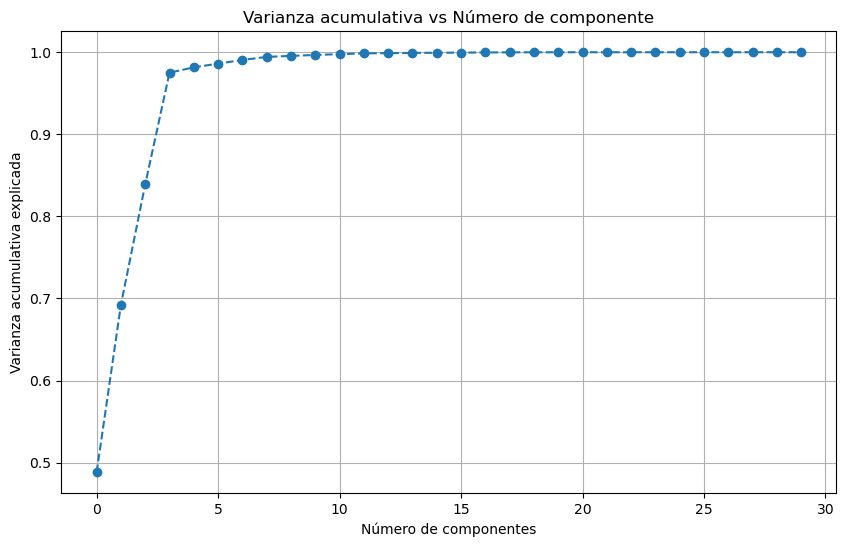

In [48]:
# Gráfica de la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_ratio_cumulative, marker='o', linestyle='--')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulativa explicada')
plt.title('Varianza acumulativa vs Número de componente')
plt.grid(True)
plt.show()

### Partición de datos

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
# Eliminar la columna 'target' del conjunto de datos de entrenamiento
X_train = dataset_train_use.drop('target', axis=1)

# Separar las etiquetas del conjunto de datos de entrenamiento
y_train = dataset_train_use['target']

#### - Con PCA

In [51]:
# Inicializar PCA con el número de componentes que deseas
pca2 = PCA(n_components=n_components_95_variance, random_state=42)

# Ajustar PCA al conjunto de entrenamiento
pca2.fit(X_train)

# Transformar los conjuntos de entrenamiento utilizando PCA
X_train_pca = pca2.transform(X_train)

# Escalar características del conjunto de datos de entrenamiento transformado
scaler1 = StandardScaler()
X_train_scaled1 = scaler1.fit_transform(X_train_pca)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_split1, X_test_split1, y_train_split1, y_test_split1 = train_test_split(X_train_scaled1, y_train, test_size=0.2, random_state=42)


#### - Sin PCA

In [52]:
# Escalar características del conjunto de datos de entrenamiento
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_split2, X_test_split2, y_train_split2, y_test_split2 = train_test_split(X_train_scaled2, y_train, test_size=0.2, random_state=42)

#### - Particióna a usar

In [53]:
# definir qué conjunto de datos usar
X_train_use = X_train_split2
X_test_use = X_test_split2
y_train_use = y_train_split2
y_test_use = y_test_split2

### Algotirmo LogisticRegression

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Inicializar y entrenar el modelo de regresión logística
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')  # Utilizando ponderación de clases
logistic_model.fit(X_train_use, y_train_use)

# Hacer predicciones sobre el conjunto de datos de prueba
y_pred_proba_test_weighted = logistic_model.predict_proba(X_test_use)[:, 1]

# Convertir probabilidades en etiquetas binarias usando un umbral de decisión de 0.5
y_pred_test_weighted_binary = (y_pred_proba_test_weighted >= 0.5).astype(int)

# Evaluar el modelo en el conjunto de datos de prueba
print("AUC ROC:", roc_auc_score(y_test_use, y_pred_proba_test_weighted))
print(classification_report(y_test_use, y_pred_test_weighted_binary))


AUC ROC: 0.7369203144773457
              precision    recall  f1-score   support

       False       0.97      0.62      0.75     25535
        True       0.10      0.72      0.18      1564

    accuracy                           0.62     27099
   macro avg       0.54      0.67      0.47     27099
weighted avg       0.92      0.62      0.72     27099



### Algotirmo RandomForestClassifier

#### - Sin hiperparámetros

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Inicializar el clasificador Random Forest
rf_classifier1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el clasificador
rf_classifier1.fit(X_train_use, y_train_use)

# Hacer predicciones sobre el conjunto de prueba
y_pred1 = rf_classifier1.predict(X_test_use)
y_pred_proba1 = rf_classifier1.predict_proba(X_test_use)[:, 1]

# Evaluar el modelo
print("AUC ROC:", roc_auc_score(y_test_use, y_pred_proba1))
print(classification_report(y_test_use, y_pred1))


AUC ROC: 0.7524269256829677
              precision    recall  f1-score   support

       False       0.94      1.00      0.97     25535
        True       0.56      0.00      0.01      1564

    accuracy                           0.94     27099
   macro avg       0.75      0.50      0.49     27099
weighted avg       0.92      0.94      0.91     27099



#### - Con hiperparámetros

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Definir los parámetros que se van a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el clasificador Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)

# Asegúrate de que X_train_use, y_train_use, X_test_use, y_test_use estén definidos aquí

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train_use, y_train_use)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Hacer predicciones sobre el conjunto de datos de prueba
y_pred_test = best_rf_model.predict(X_test_use)  # Usar predict en lugar de predict_proba para obtener etiquetas directamente

# Evaluar el modelo en el conjunto de datos de prueba
print("AUC ROC:", roc_auc_score(y_test_use, best_rf_model.predict_proba(X_test_use)[:, 1]))
print(classification_report(y_test_use, y_pred_test))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
AUC ROC: 0.7724219352906622
              precision    recall  f1-score   support

       False       0.94      1.00      0.97     25535
        True       0.00      0.00      0.00      1564

    accuracy                           0.94     27099
   macro avg       0.47      0.50      0.49     27099
weighted avg       0.89      0.94      0.91     27099



### Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Inicializar el modelo Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Entrenar el modelo
gb_classifier.fit(X_train_use, y_train_use)

# Realizar predicciones en el conjunto de prueba
y_pred_proba_gb = gb_classifier.predict_proba(X_test_use)[:, 1]

# Evaluar el modelo
print("AUC ROC:", roc_auc_score(y_test_use, y_pred_proba_gb))
print(classification_report(y_test_use, (y_pred_proba_gb >= 0.5).astype(int)))


AUC ROC: 0.7726989483868738
              precision    recall  f1-score   support

       False       0.94      1.00      0.97     25535
        True       0.10      0.00      0.00      1564

    accuracy                           0.94     27099
   macro avg       0.52      0.50      0.49     27099
weighted avg       0.89      0.94      0.91     27099



### Gradient Boosting Classifier y GridSearchCV

Como requiere de mucha memoria se crea un dataset más pequeño y equilibrado de 6000 registros (3000 fraude y 3000 no fraude)

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report

# Identificar las clases de la variable objetivo
clases = dataset_train_use['target'].unique()

# Calcular el tamaño de la muestra para cada clase (asumiendo que deseas el mismo tamaño para todas las clases)
tamaño_muestra_por_clase = 3000  # Ajusta según sea necesario

# Inicializar un DataFrame vacío para almacenar la muestra equilibrada
dataset_train_sample = pd.DataFrame()

# Obtener una muestra equilibrada de cada clase
for clase in clases:
    clase_muestra = dataset_train_use[dataset_train_use['target'] == clase].sample(n=tamaño_muestra_por_clase, random_state=42)
    dataset_train_sample = pd.concat([dataset_train_sample, clase_muestra])

# Aleatorizar el orden de las filas en la muestra resultante
dataset_train_sample = dataset_train_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# Eliminar la columna 'target' del conjunto de datos de entrenamiento
X_train_sample = dataset_train_sample.drop('target', axis=1)
y_train_sample = dataset_train_sample['target']

# Escalar características del conjunto de datos de entrenamiento
scaler_sample = StandardScaler()
X_train_sample_scaled = scaler_sample.fit_transform(X_train_sample)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_split_sample, X_test_split_sample, y_train_split_sample, y_test_split_sample = train_test_split(X_train_sample_scaled, y_train_sample, test_size=0.2, random_state=42)


In [58]:
print('\nInfo del dataset "X_train_sample":\n')
X_train_sample.info()


Info del dataset "X_train_sample":

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   disrict                    6000 non-null   category
 1   client_catg                6000 non-null   category
 2   region                     6000 non-null   category
 3   region_group               6000 non-null   category
 4   months_old                 6000 non-null   int32   
 5   number_invoices            6000 non-null   int64   
 6   is_weekday_mean            6000 non-null   float64 
 7   counter_type_mean          6000 non-null   float64 
 8   variation_index_mean       6000 non-null   float64 
 9   variation_time_mean        6000 non-null   float64 
 10  variation_time_std         6000 non-null   float64 
 11  variation_time_min         6000 non-null   float64 
 12  variation_time_max         6000 non-null   float64 
 

In [59]:
# Definir el rango de hiperparámetros a explorar
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
}

# Inicializar el clasificador Gradient Boosting
gb_classifier2 = GradientBoostingClassifier(random_state=42)

# Inicializar la búsqueda grid con validación cruzada de 5 folds
grid_search2 = GridSearchCV(gb_classifier2, param_grid_gb, cv=5, scoring='roc_auc')

# Ajustar la búsqueda grid al conjunto de datos de entrenamiento
grid_search2.fit(X_train_sample_scaled, y_train_sample)

# Obtener los mejores hiperparámetros encontrados
best_params_gb = grid_search2.best_params_
print("Mejores hiperparámetros:", best_params_gb)

# Obtener el mejor modelo encontrado
best_gb_model = grid_search2.best_estimator_

# Predecir las probabilidades en el conjunto de datos de prueba
y_pred_proba_test_gb = best_gb_model.predict_proba(X_test_split_sample)[:, 1]

# Ajustar el umbral de decisión para mejorar el recall
threshold = 0.3  # Ajustar el umbral según se necesite
y_pred_gb = (y_pred_proba_test_gb >= threshold).astype(int)

# Evaluar el modelo
print("AUC ROC:", roc_auc_score(y_test_split_sample, y_pred_proba_test_gb))
print(classification_report(y_test_split_sample, y_pred_gb))


Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
AUC ROC: 0.8348517526208713
              precision    recall  f1-score   support

       False       0.87      0.40      0.55       614
        True       0.60      0.94      0.73       586

    accuracy                           0.66      1200
   macro avg       0.74      0.67      0.64      1200
weighted avg       0.74      0.66      0.64      1200



In [60]:
dataset_test_use_dropA.columns

Index(['disrict', 'client_catg', 'region', 'target', 'region_group',
       'months_old', 'number_invoices', 'is_weekday_mean', 'counter_type_mean',
       'variation_index_mean', 'variation_time_mean', 'variation_time_std',
       'variation_time_min', 'variation_time_max', 'consommation_level_1_mean',
       'consommation_level_1_std', 'consommation_level_1_min',
       'consommation_level_1_max', 'consommation_level_2_mean',
       'consommation_level_2_std', 'consommation_level_2_min',
       'consommation_level_2_max', 'consommation_level_3_mean',
       'consommation_level_3_std', 'consommation_level_3_min',
       'consommation_level_3_max', 'consommation_level_4_mean',
       'consommation_level_4_std', 'consommation_level_4_min',
       'consommation_level_4_max'],
      dtype='object')

In [61]:
# Escalar características del conjunto de datos de clientes (si es necesario)
X_clientes_scaled = scaler_sample.transform(dataset_test_use_dropA.drop(columns=['target']))

# Predecir las probabilidades de fraude para los clientes en el conjunto de datos de clientes
probabilidades_fraude_clientes = best_gb_model.predict_proba(X_clientes_scaled)[:, 1]

# Agregar las probabilidades de fraude como una nueva columna en el DataFrame 'clientes'
dataset_test_useA['probabilidad_fraude'] = probabilidades_fraude_clientes

In [62]:
# Seleccionar las columnas requeridas para exportar
export_data = dataset_test_useA[['client_id', 'target', 'probabilidad_fraude']]
export_data.head(n=30)


,client_id,target,probabilidad_fraude
0,train_Client_0,False,0.435164
1,train_Client_1,False,0.383864
2,train_Client_10,False,0.354789
3,train_Client_100,False,0.098309
4,train_Client_1000,False,0.223213
5,train_Client_10000,False,0.750607
6,train_Client_100000,False,0.408226
7,train_Client_100001,False,0.373553
8,train_Client_100002,False,0.046731
9,train_Client_100003,False,0.766620


Usando dataset test

In [64]:
dataset_test_useB = dataset_test_new1
dataset_test_use_dropB = drop_columns(dataset_test_new1)

In [65]:
# Escalar características del conjunto de datos de clientes (si es necesario)
X_clientes_scaled2 = scaler_sample.transform(dataset_test_use_dropB)

# Predecir las probabilidades de fraude para los clientes en el conjunto de datos de clientes
probabilidades_fraude_clientes2 = best_gb_model.predict_proba(X_clientes_scaled2)[:, 1]

# Agregar las probabilidades de fraude como una nueva columna en el DataFrame 'clientes'
dataset_test_useB['probabilidad_fraude'] = probabilidades_fraude_clientes2

In [66]:
# Seleccionar las columnas requeridas para exportar
export_data2 = dataset_test_useB[['client_id', 'probabilidad_fraude']]
export_data2.head(n=30)


,client_id,probabilidad_fraude
0,test_Client_0,0.633535
1,test_Client_1,0.869357
2,test_Client_10,0.411824
3,test_Client_100,0.380802
4,test_Client_1000,0.425372
5,test_Client_10000,0.469727
6,test_Client_10001,0.202965
7,test_Client_10002,0.770347
8,test_Client_10003,0.193313
9,test_Client_10004,0.565341


### Entrnenamiento red neuronal 

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Verificar la disponibilidad de la GPU y seleccionar el dispositivo:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definir la estructura de la red neuronal:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_features=29, out_features=64)  # Asumiendo 20 entradas, 64 salidas
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Crear una instancia de la red neuronal y moverla a la GPU
net = Net().to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Preparar los datos para PyTorch
X_train_tensor = torch.tensor(X_train_use, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_use.to_numpy(), dtype=torch.float32).to(device)

# Crear un DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Entrenar la red neuronal
net.train()
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader)}")

# Evaluar la red neuronal
net.eval()
X_test_tensor = torch.tensor(X_test_use, dtype=torch.float32).to(device) 
y_test_tensor = torch.tensor(y_test_use, dtype=torch.float32).to(device) 
y_pred_tensor = net(X_test_tensor)
y_pred = y_pred_tensor.cpu().detach().numpy()

#Imprimimos los resultados
print("AUC ROC:", roc_auc_score(y_test_use, y_pred))
print(classification_report(y_test_use, (y_pred >= 0.5).astype(int)))




Epoch 1/10 - Loss: 0.2015966227654161
Epoch 2/10 - Loss: 0.19188861176151664
Epoch 3/10 - Loss: 0.19070788572950303
Epoch 4/10 - Loss: 0.18936689121488134
Epoch 5/10 - Loss: 0.1887290146808803
Epoch 6/10 - Loss: 0.18792115597421613
Epoch 7/10 - Loss: 0.1872117218540579
Epoch 8/10 - Loss: 0.18681542708405427
Epoch 9/10 - Loss: 0.18606209354706046
Epoch 10/10 - Loss: 0.18544311925038748
AUC ROC: 0.7725276900418011
              precision    recall  f1-score   support

       False       0.94      1.00      0.97     25535
        True       0.35      0.01      0.01      1564

    accuracy                           0.94     27099
   macro avg       0.65      0.50      0.49     27099
weighted avg       0.91      0.94      0.91     27099



Optimización de parametros

In [87]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Verificar la disponibilidad de la GPU y seleccionar el dispositivo:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Definir la estructura de la red neuronal:
class Net(nn.Module):
    def __init__(self, trial):
        super(Net, self).__init__()
        self.layers = []
        n_layers = trial.suggest_int('n_layers', 1, 3)
        in_features = 29
        for i in range(n_layers):
            out_features = trial.suggest_int(f'n_units_l{i}', 4, 128)
            layer = nn.Linear(in_features, out_features)
            in_features = out_features
            self.layers.append(layer)
            self.add_module(f'fc{i}', layer)
        self.out = nn.Linear(in_features, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        x = self.sigmoid(self.out(x))
        return x

# Definir la función objetivo para Optuna
def objective(trial):
    net = Net(trial).to(device)
    
    # Definir la función de pérdida y el optimizador
    criterion = nn.BCELoss()
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
    optimizer = optim.Adam(net.parameters(), lr=lr)

    # Crear un DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=trial.suggest_int('batch_size', 16, 128), shuffle=True)

    # Entrenar la red neuronal
    epochs = 10
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = net(data)
            loss = criterion(output, target.view(-1, 1))
            loss.backward()
            optimizer.step()

    # Evaluar la red neuronal
    net.eval()
    with torch.no_grad():
        y_pred = net(X_test_tensor).cpu()
        accuracy = roc_auc_score(y_test_use, y_pred.numpy())
    
    return accuracy

# Crear un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Obtener los mejores hiperparámetros encontrados
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


[I 2024-03-11 21:30:28,000] A new study created in memory with name: no-name-ac7a981a-22f2-4bdd-abe1-4fbb04444d0c
[I 2024-03-11 21:31:03,554] Trial 0 finished with value: 0.7630436535380705 and parameters: {'n_layers': 2, 'n_units_l0': 121, 'n_units_l1': 59, 'lr': 6.058682220891451e-05, 'batch_size': 71}. Best is trial 0 with value: 0.7630436535380705.
[I 2024-03-11 21:31:55,868] Trial 1 finished with value: 0.7248058679802107 and parameters: {'n_layers': 1, 'n_units_l0': 38, 'lr': 0.05151033163070769, 'batch_size': 35}. Best is trial 0 with value: 0.7630436535380705.
[I 2024-03-11 21:32:27,719] Trial 2 finished with value: 0.7674475057303125 and parameters: {'n_layers': 3, 'n_units_l0': 118, 'n_units_l1': 114, 'n_units_l2': 112, 'lr': 0.010384773648840521, 'batch_size': 88}. Best is trial 2 with value: 0.7674475057303125.
[I 2024-03-11 21:32:57,699] Trial 3 finished with value: 0.736978243592241 and parameters: {'n_layers': 1, 'n_units_l0': 17, 'lr': 6.679940341509297e-05, 'batch_size

Number of finished trials: 100
Best trial: {'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 90, 'n_units_l2': 111, 'lr': 0.0005728080492013822, 'batch_size': 41}
